<a href="https://colab.research.google.com/github/Rohit1208/machine_learning/blob/main/SVM_on_prediction_M_F_voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/voice.csv')

In [4]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [154]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

##Data visualization

In [7]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

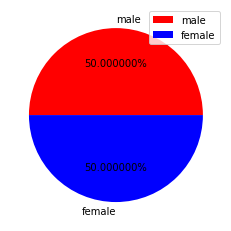

In [8]:
plt.pie(x=df['label'].value_counts(),labels=['male','female'],colors=['red','blue'],autopct='%2f%%',data='df')
plt.legend()
plt.show()

 Considering all the features as independent feature and 'label' as dependent feature, split the dataset into training and testing data with test size=20%

In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
x.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [11]:
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

Due to the  N no. of feature present in the datasets and also deal with the  the appropriate feature

In [12]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=10)

In [14]:
xp = pca.fit_transform(x)

In [19]:
xp = pd.DataFrame(xp)
print(xp)

               0         1         2  ...         7         8         9
0     238.081294 -4.802247 -2.248039  ...  0.132297  0.081558  0.147256
1     598.396593 -1.021374 -0.881788  ...  0.061454  0.028554  0.162663
2     988.762667  3.022605  2.620214  ...  0.048415  0.006888  0.164207
3     -32.368181 -6.639116  1.157241  ...  0.010716 -0.033846 -0.007879
4     -32.286811  0.339167  1.048950  ...  0.009797 -0.018290  0.016661
...          ...       ...       ...  ...       ...       ...       ...
3163  -29.953017 -1.439902  0.531723  ... -0.072703  0.014191  0.048567
3164  -34.102331 -2.214047  1.498090  ...  0.130439 -0.013538  0.039002
3165  -29.956743 -3.265185  0.468605  ...  0.084619 -0.011046 -0.046759
3166  -31.190874 -2.320620  0.691941  ... -0.097667  0.049170  0.010116
3167  -30.762698 -6.644832  0.732112  ... -0.164726  0.052918 -0.002654

[3168 rows x 10 columns]


##split the data into train and test

In [23]:
from sklearn.model_selection import train_test_split

In [130]:
x_train,x_test,y_train,y_test = train_test_split(xp,y,test_size=0.20)

In [25]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9
771,-26.999809,1.860771,0.025948,0.186089,0.081093,0.050287,0.073729,0.002689,0.053694,0.001693
2207,-28.530673,5.210736,-0.286331,0.295195,0.002416,0.001424,-0.037346,0.023054,-0.012643,0.012118
2846,-26.271253,9.414669,-0.725604,-0.132709,-0.093230,0.003369,-0.066158,-0.024509,-0.047384,0.003239
833,-33.460085,2.574421,1.072493,-0.423709,0.209266,-0.061692,0.013766,-0.015025,-0.004035,-0.006975
1973,-20.434090,-4.691891,-0.773048,0.096433,-0.372067,-0.091399,-0.066779,-0.102919,-0.032559,-0.032593


In [26]:
y_test.head()

3113    female
3153    female
3130    female
1325      male
858       male
Name: label, dtype: object

In [35]:
y_train

array([1, 0, 0, ..., 1, 0, 1])

##changing the categorical value into numerical on the dependent variable

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [144]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

##Build the model 

In [21]:
from sklearn.svm import SVC

In [145]:
svc = SVC(C=0.09,kernel='linear',gamma=10)

In [146]:
svc.fit(x_train,y_train)

SVC(C=0.09, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [147]:
print('the training score',svc.score(x_train,y_train))
print('the testing score',svc.score(x_test,y_test))

the training score 0.8267561168113654
the testing score 0.804416403785489


In [148]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [149]:
y_predp = svc.predict(x_test)
print(y_predp)

[0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0
 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0
 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1
 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1
 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 

##evaluation part

In [151]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [136]:
accuracy_score(y_test,y_predp)

0.804416403785489

In [150]:
cr = classification_report(y_test,y_predp)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       321
           1       0.75      0.91      0.82       313

    accuracy                           0.80       634
   macro avg       0.82      0.81      0.80       634
weighted avg       0.82      0.80      0.80       634



In [153]:
cm = confusion_matrix(y_test,y_predp)
print(cm)

[[225  96]
 [ 28 285]]


##The model has good accuracy  and motive of of my model is to predict the value is whether check the voice is male or female